In [9]:
# Import important libraries
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [10]:
# Store CSV file
csv="house_rent.csv"

# Check file extention
if csv.split(".")[-1] != "csv":
    raise ValueError("Wrong file format detected, CSV file needed!")


In [11]:
# Convert csv to dataframe
df=pd.read_csv(csv)

# Get column list of csv
column_list=df.columns.tolist()

# Check column for "Rent","Size", and "City"
required_columns = ['Rent', 'Size', 'City']
if not all(column in column_list for column in required_columns):
    raise ValueError("""CSV should have to "Rent","Size", and "City" columns""")


In [12]:
# Users preferable input
city=input("Enter your prefered city: ").lower()
rent=int(input("Enter your maximum rent you want to pay in number: "))
size=int(input("Enter your desire minimum house size in squire foot number: "))


Enter your prefered city:  Bangalore
Enter your maximum rent you want to pay in number:  10000
Enter your desire minimum house size in squire foot number:  1000


In [13]:
# Fill missing value for empty cell
df = df.fillna("")

selected_row_idx=[]
# Loop through csv file
for i,row in df.iterrows():
    if row["City"].lower()==city and row["Rent"]<=rent and row["Size"]>=size:
        selected_row_idx.append(i)
print(selected_row_idx)

[1531, 1604, 1608, 1632, 1651, 1736, 1764, 1769, 1770, 1774, 1822, 1854, 1876, 1884, 1906, 1939, 1996, 2001, 2109, 2298, 2351]


In [14]:
# Generate new CSV file with all house data the found by user preference
found_df=df.iloc[selected_row_idx]

# For a unique file name, use timestamp
from datetime import datetime
timestamp=datetime.now().timestamp()
str_time=str(int(timestamp))

# New file name
new_csv = f"filtered_houses_{str_time}.csv"
# Convert to csv and store into local folder
found_df.to_csv(new_csv,index=False)


In [15]:
# Show filtered house list
styled_df = found_df.style.set_table_attributes('class="table table-striped"').set_caption("🏠 Filtered House")
display(styled_df)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1531,2022-06-08,2,10000,1200,Ground out of 4,Super Area,Jogupalya,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
1604,2022-06-20,2,10000,1200,Ground out of 4,Super Area,K R Puram,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1608,2022-07-07,2,9000,1200,3 out of 4,Super Area,Gottigere,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1632,2022-05-27,2,10000,1200,1 out of 2,Super Area,Kengeri,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1651,2022-05-31,2,8500,1000,Ground out of 3,Super Area,Kachohalli,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1736,2022-05-17,2,10000,1000,2 out of 2,Super Area,Mathikere,Bangalore,Semi-Furnished,Bachelors,2,Contact Owner
1764,2022-06-23,2,10000,1000,1 out of 3,Super Area,Varthur,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1769,2022-06-20,1,10000,1000,Ground out of 2,Super Area,K R Puram,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1770,2022-06-20,2,10000,1200,1 out of 2,Super Area,Ramamurthy Nagar,Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
1774,2022-06-30,2,10000,1000,1 out of 3,Super Area,"Ilyas Nagar, Kumaraswamy Layout",Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner


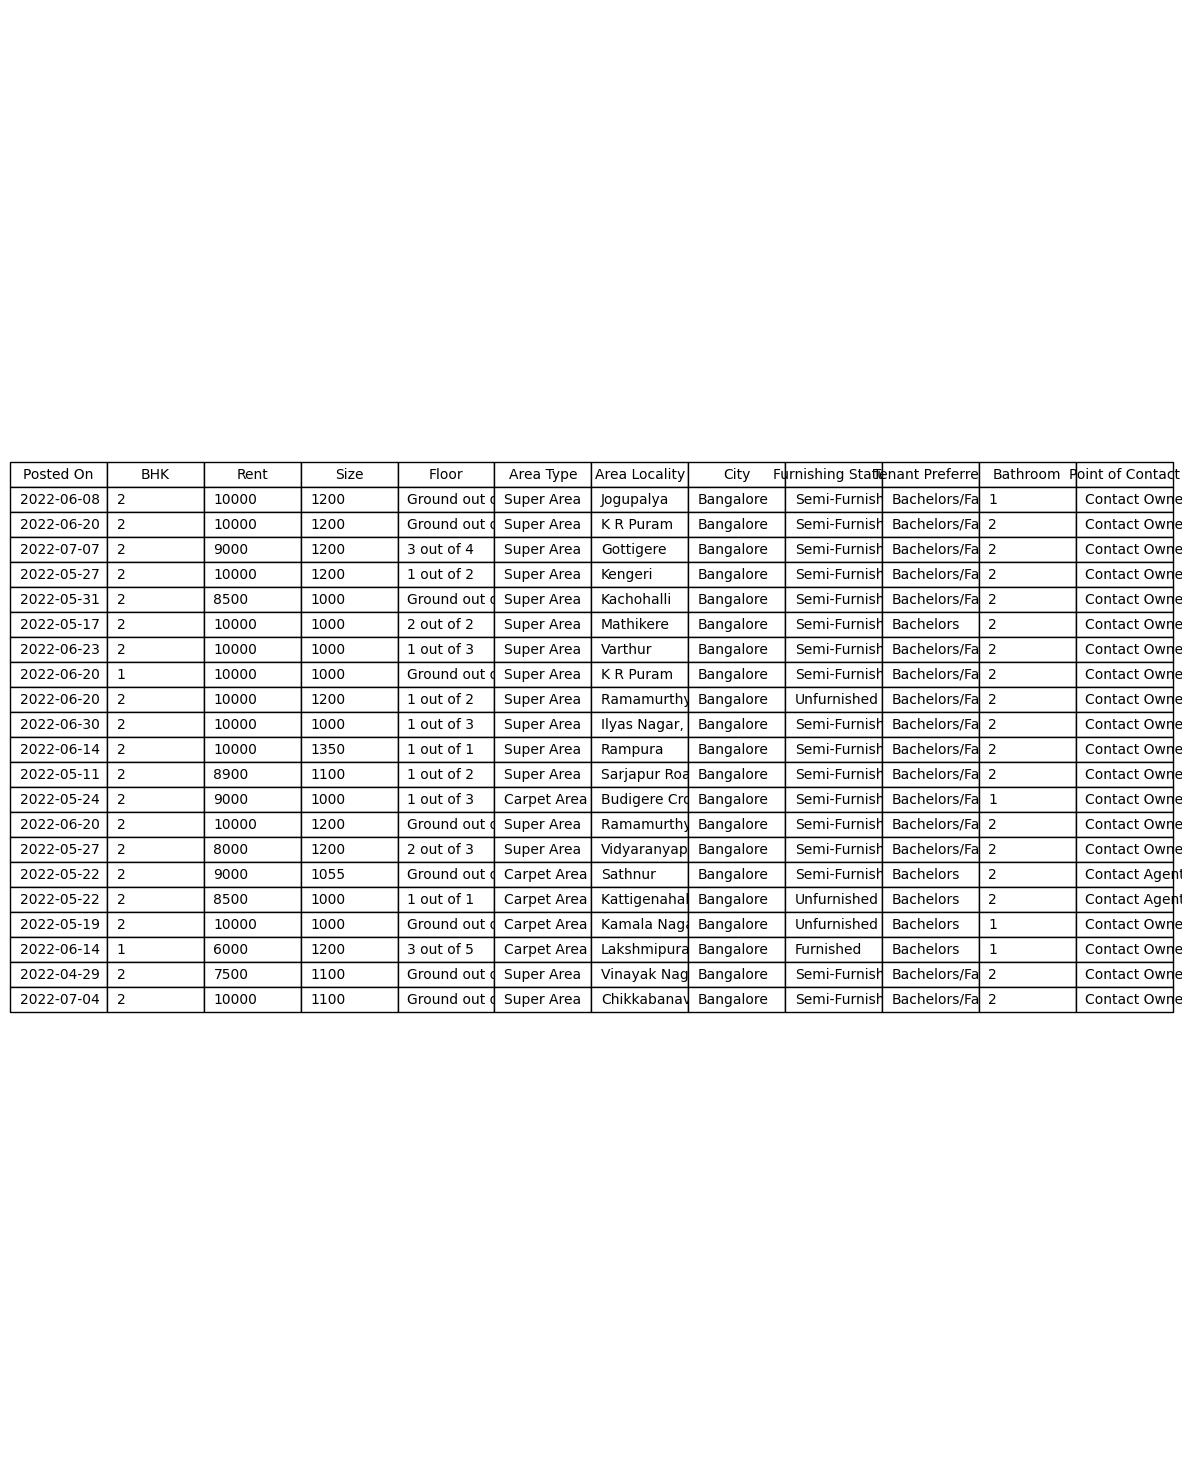

In [16]:
# Show filtered houses as image
df=pd.read_csv(new_csv)

# Setup figure
fig, ax = plt.subplots(figsize=(15, len(found_df)*0.9))
ax.axis('off')

# Create table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='left')

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Save to image
plt.savefig(f"new_house_record_{str_time}.png", bbox_inches="tight", dpi=300)

# Show in notebook
plt.show()

In [17]:
pip freeze | grep -E "pandas|ipython|matplotlib" > requirements.txt

Note: you may need to restart the kernel to use updated packages.
